In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
path = '/content/drive/MyDrive/EXCEL_ESTRUCTURA/'

In [ ]:
import os
os.listdir(path)

['EXCEL 112_MUNICIPIOS_DISTANCIAS_INFRAESTRUCTURAS.xlsx',
 'EXCEL 110_MUN_ALTITUDYPENDI.xlsx',
 'EXCEL 111_MUNICIPIOS_DISTANCIA A NUCMAS10MILHAB.xlsx',
 'EXCEL110B_NUCLEOS_AE_MDTYPENDIENTES.xlsx',
 'EXCEL111B_NUCLEOS_DISTANCIA A NUC MAS10000HAB.xlsx',
 'GEODATOS_DICCIONARIO_CAMPOS_12_03_2022OLGA.docx',
 'EXCEL112B_NUCLEOS_DISTANCIAS_INFRAESTRUCTURAS.xlsx']

In [ ]:
df_112   = pd.read_excel(path + 'EXCEL 112_MUNICIPIOS_DISTANCIAS_INFRAESTRUCTURAS.xlsx')
df_110   = pd.read_excel(path + 'EXCEL 110_MUN_ALTITUDYPENDI.xlsx')
df_111   = pd.read_excel(path + 'EXCEL 111_MUNICIPIOS_DISTANCIA A NUCMAS10MILHAB.xlsx')
df_110_b = pd.read_excel(path + 'EXCEL110B_NUCLEOS_AE_MDTYPENDIENTES.xlsx')
df_111_b = pd.read_excel(path + 'EXCEL111B_NUCLEOS_DISTANCIA A NUC MAS10000HAB.xlsx')
df_112_b = pd.read_excel(path + 'EXCEL112B_NUCLEOS_DISTANCIAS_INFRAESTRUCTURAS.xlsx')

In [ ]:
my_dfs = [x for x in vars().keys() if x[:2] == "df"]
for my_df in my_dfs:
  print("Shape for %s dataframe: %s" % (my_df, vars()[my_df].shape))

Shape for df_112 dataframe: (3931, 16)
Shape for df_110 dataframe: (3931, 11)
Shape for df_111 dataframe: (3931, 6)
Shape for df_110_b dataframe: (22969, 6)
Shape for df_111_b dataframe: (22969, 5)
Shape for df_112_b dataframe: (22969, 5)


In [ ]:
for my_df in my_dfs:
  print("COLUMNS AND TYPES FOR %s:" % (my_df))
  d = dict(vars()[my_df].dtypes)
  for col in d.keys():
    print(col + " -> " + str(d[col]))
  print("\n")

COLUMNS AND TYPES FOR df_112:
CODMUNI -> int64
MINCARRETN -> float64
MAXCARRETN -> float64
RANGECARRETN -> float64
MEANCARRETN -> float64
STDCARRETN -> float64
MINDISAUT -> float64
MAXDISAUT -> float64
RANGEDISAUT -> float64
MEANDISAUT -> float64
STDDISAUT -> float64
MINDISFERR -> float64
MAXDISFERR -> float64
RANGEDISFERR -> float64
MEANDISFERR -> float64
STDDISFERR -> float64


COLUMNS AND TYPES FOR df_110:
CODMUNI -> int64
MINMDT -> int64
MAXMDT -> int64
RANGEMDT -> int64
MEANMDT -> float64
STDMDT -> float64
MINPENDI -> float64
MAXPENDI -> float64
RANGEPENDI -> float64
MEANPENDI -> float64
STDPENDI -> float64


COLUMNS AND TYPES FOR df_111:
CODMUNI -> int64
MINDISN10M -> float64
MAXDISN10M -> float64
RANGEDISN10M -> float64
MEANDISN10M -> float64
STDDISN10M -> float64


COLUMNS AND TYPES FOR df_110_b:
CODIGO_INE -> int64
ETIQUETA -> object
Provincia -> object
Municipio -> object
MDTVALUE -> int64
PENDIVALUE -> float64


COLUMNS AND TYPES FOR df_111_b:
CODIGO_INE -> int64
ETIQUETA ->

In [ ]:
def codmun_to_str(l):
  res = list(map(lambda x: "0" + x if len(x) == 4 else x, list(l.astype(str))))
  return res

In [ ]:
df_112["CODMUNI"] = codmun_to_str(df_112["CODMUNI"])
df_110["CODMUNI"] = codmun_to_str(df_110["CODMUNI"])
df_111["CODMUNI"] = codmun_to_str(df_111["CODMUNI"])
df_110_b["CODIGO_INE"] = codmun_to_str(df_110_b["CODIGO_INE"])
df_111_b["CODIGO_INE"] = codmun_to_str(df_111_b["CODIGO_INE"])
df_112_b["CODIGO_INE"] = codmun_to_str(df_112_b["CODIGO_INE"])

In [ ]:
df_110_b.rename(columns = {'CODIGO_INE':'CODMUNI'}, inplace = True)
df_111_b.rename(columns = {'CODIGO_INE':'CODMUNI'}, inplace = True)
df_112_b.rename(columns = {'CODIGO_INE':'CODMUNI'}, inplace = True)

In [ ]:
for my_df in my_dfs:
  print("COLUMNS AND TYPES FOR %s:" % (my_df))
  d = dict(vars()[my_df].dtypes)
  for col in d.keys():
    if col == "CODMUNI":
      print(col + " -> " + str(d[col]))
  print("\n")

COLUMNS AND TYPES FOR df_112:
CODMUNI -> object


COLUMNS AND TYPES FOR df_110:
CODMUNI -> object


COLUMNS AND TYPES FOR df_111:
CODMUNI -> object


COLUMNS AND TYPES FOR df_110_b:
CODMUNI -> object


COLUMNS AND TYPES FOR df_111_b:
CODMUNI -> object


COLUMNS AND TYPES FOR df_112_b:
CODMUNI -> object




In [ ]:
my_dfs_municipio = my_dfs[:3]
print(my_dfs_municipio)
my_dfs_nucleo    = my_dfs[3:]
print(my_dfs_nucleo)

['df_112', 'df_110', 'df_111']
['df_110_b', 'df_111_b', 'df_112_b']


In [ ]:
from functools import reduce
my_dfs_municipio = [df_112, df_110, df_111]
res_municipio = reduce(lambda df1, df2: pd.merge(df1, df2, on = 'CODMUNI'), my_dfs_municipio)
print("Shape for MUNICIPIOS dataframe: %s" % str(res_municipio.shape))

#my_dfs_nucleo = [df_110_b, df_111_b, df_112_b]
#res_nucleo = reduce(lambda df1, df2: pd.merge(df1, df2, on = 'CODMUNI'), my_dfs_nucleo)
#print("Shape for NUCLEOS dataframe: %s" % str(res_nucleo.shape))

Shape for MUNICIPIOS dataframe: (3931, 31)


Algo raro pasa con los nucleos

In [ ]:
res_municipio.dtypes

CODMUNI          object
MINCARRETN      float64
MAXCARRETN      float64
RANGECARRETN    float64
MEANCARRETN     float64
STDCARRETN      float64
MINDISAUT       float64
MAXDISAUT       float64
RANGEDISAUT     float64
MEANDISAUT      float64
STDDISAUT       float64
MINDISFERR      float64
MAXDISFERR      float64
RANGEDISFERR    float64
MEANDISFERR     float64
STDDISFERR      float64
MINMDT            int64
MAXMDT            int64
RANGEMDT          int64
MEANMDT         float64
STDMDT          float64
MINPENDI        float64
MAXPENDI        float64
RANGEPENDI      float64
MEANPENDI       float64
STDPENDI        float64
MINDISN10M      float64
MAXDISN10M      float64
RANGEDISN10M    float64
MEANDISN10M     float64
STDDISN10M      float64
dtype: object

In [ ]:
for col in res_municipio.columns[1:]:
  n = res_municipio[col].isna().sum()
  print("Missing values for column %s: %s" % (col, n))

Missing values for column MINCARRETN: 0
Missing values for column MAXCARRETN: 0
Missing values for column RANGECARRETN: 0
Missing values for column MEANCARRETN: 0
Missing values for column STDCARRETN: 0
Missing values for column MINDISAUT: 0
Missing values for column MAXDISAUT: 0
Missing values for column RANGEDISAUT: 0
Missing values for column MEANDISAUT: 0
Missing values for column STDDISAUT: 0
Missing values for column MINDISFERR: 0
Missing values for column MAXDISFERR: 0
Missing values for column RANGEDISFERR: 0
Missing values for column MEANDISFERR: 0
Missing values for column STDDISFERR: 0
Missing values for column MINMDT: 0
Missing values for column MAXMDT: 0
Missing values for column RANGEMDT: 0
Missing values for column MEANMDT: 0
Missing values for column STDMDT: 0
Missing values for column MINPENDI: 0
Missing values for column MAXPENDI: 0
Missing values for column RANGEPENDI: 0
Missing values for column MEANPENDI: 0
Missing values for column STDPENDI: 0
Missing values for c

In [ ]:
!pip install ptitprince 
import ptitprince as pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 451 kB/s 
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8426 sha256=842f1ba7596001130a12e8e246c6174b02a1a8f4219f5a6e511646cbe10418b6
  Stored in directory: /root/.cache/pip/wheels/58/a5/f2/55920bbc5d0e6fb74b2370e1e52e07c236ba7b621236ea5a81
Successfully built ptitprince


In [ ]:
import matplotlib.pyplot as plt
def raincloud_plotter(col_name):
  dy = col_name
  ort = "h"
  pal = "Blues"
  sigma = .075# Change if desired

  f, ax = plt.subplots(figsize=(18, 9))
  pt.RainCloud(y = dy, data = res_municipio, palette = pal,
       bw = sigma,width_viol = .5, ax = ax, orient = ort)
  plt.xlabel(col_name + " (m)")
  plt.title("Raincloudplot for %s. Missing values removed." % col_name)
  plt.show()



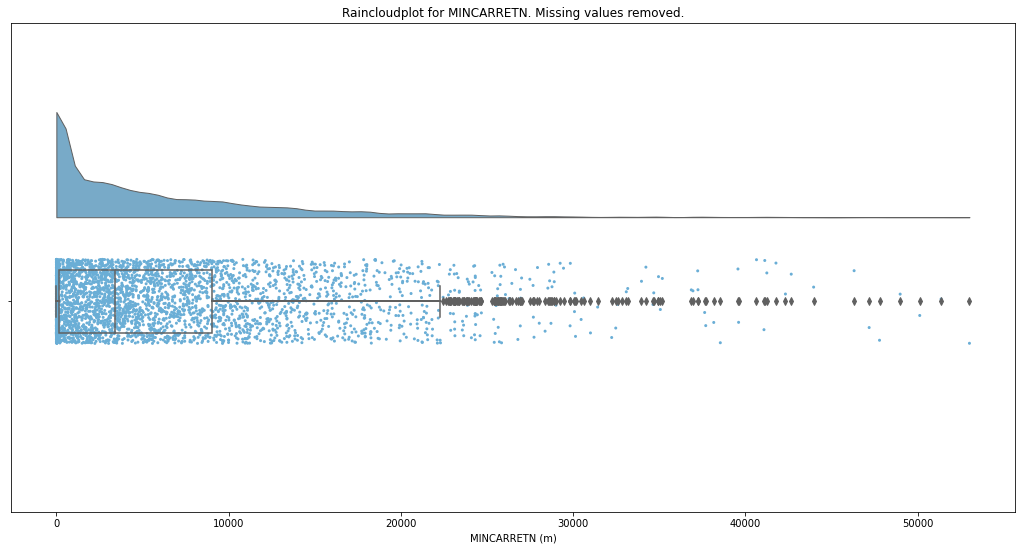

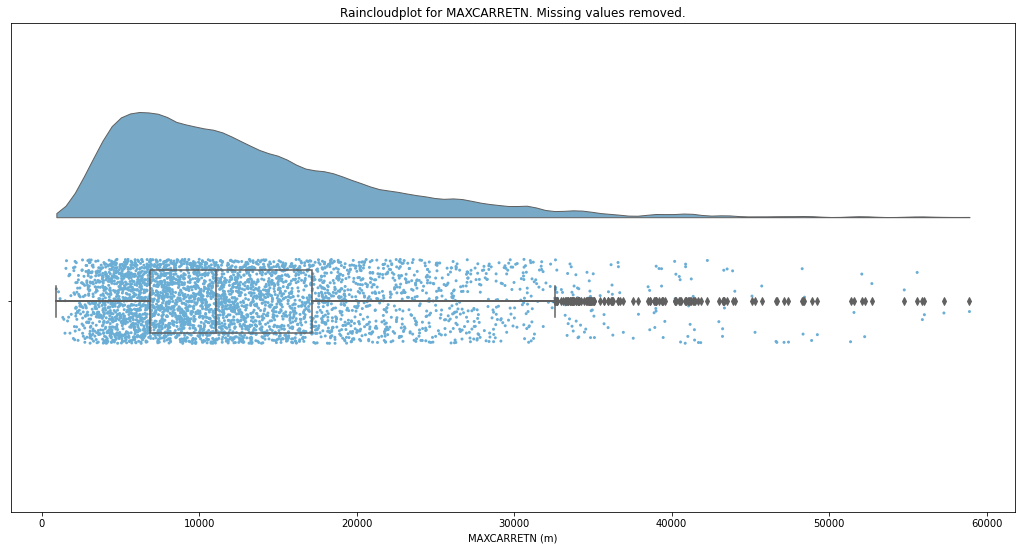

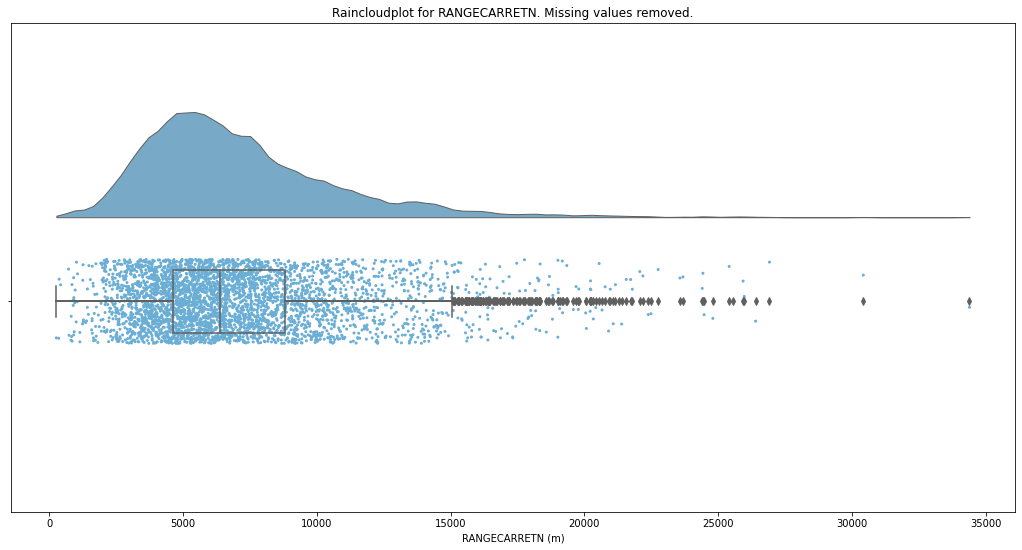

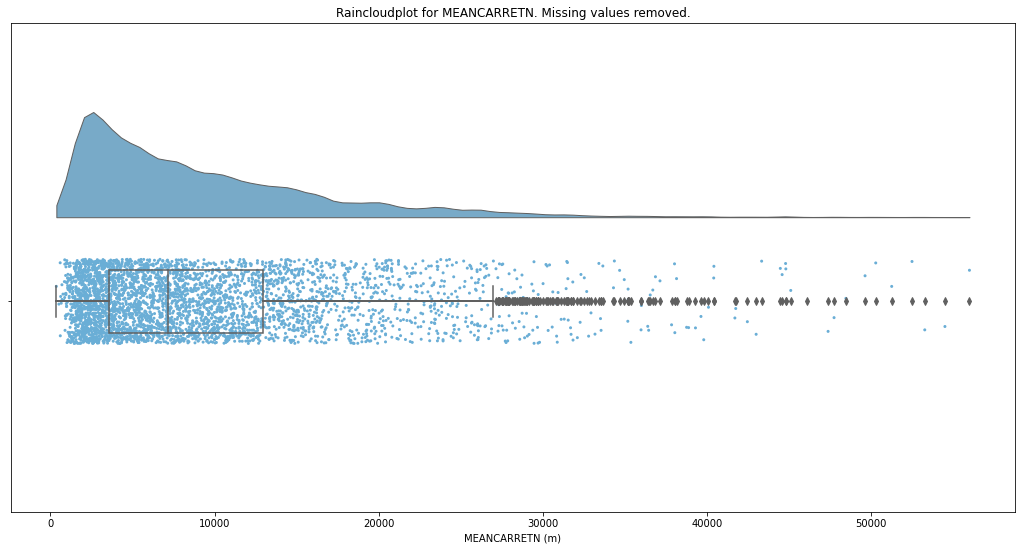

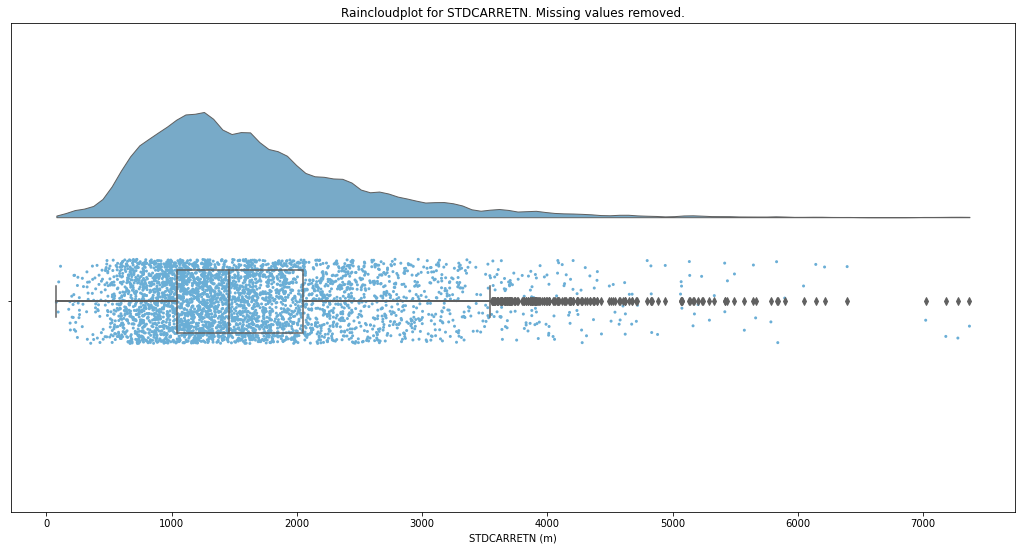

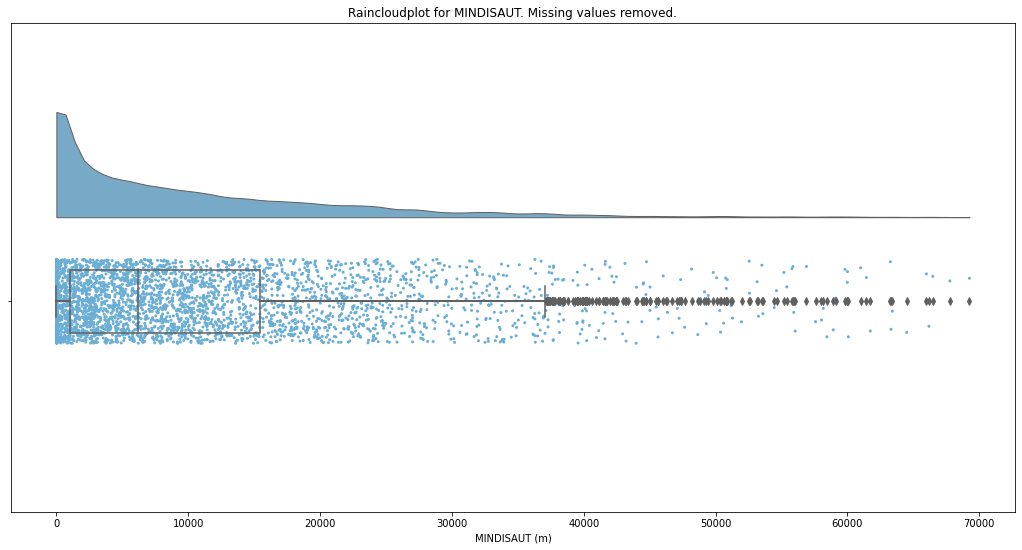

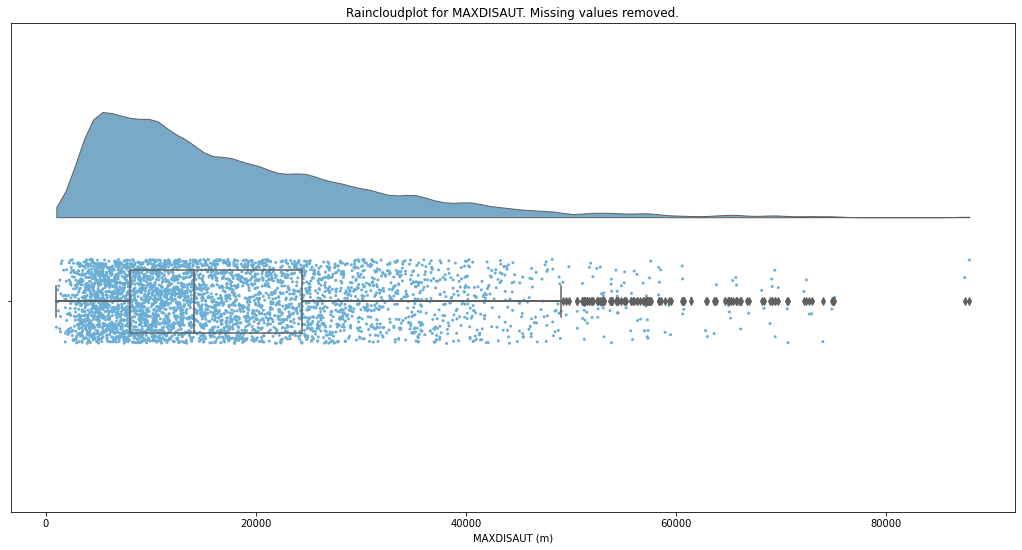

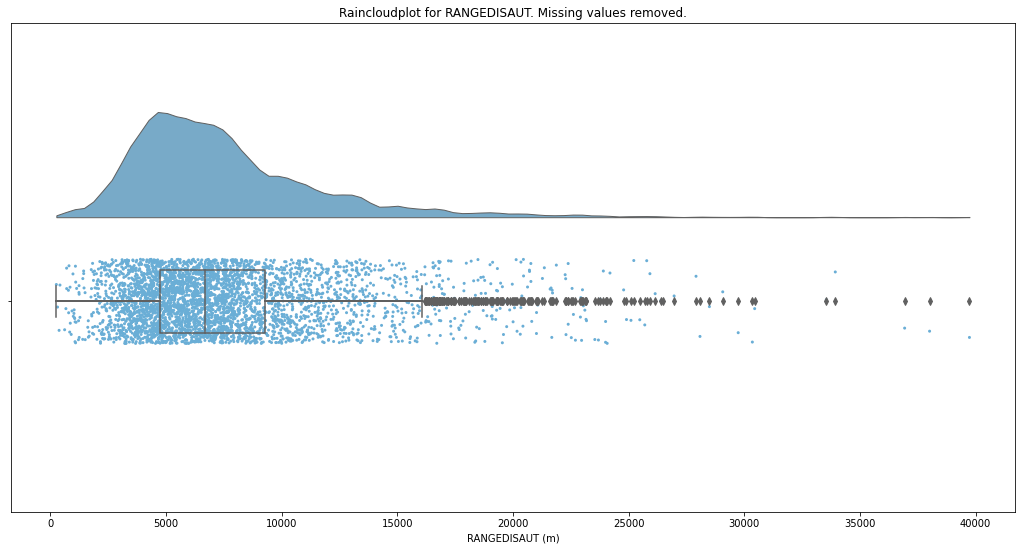

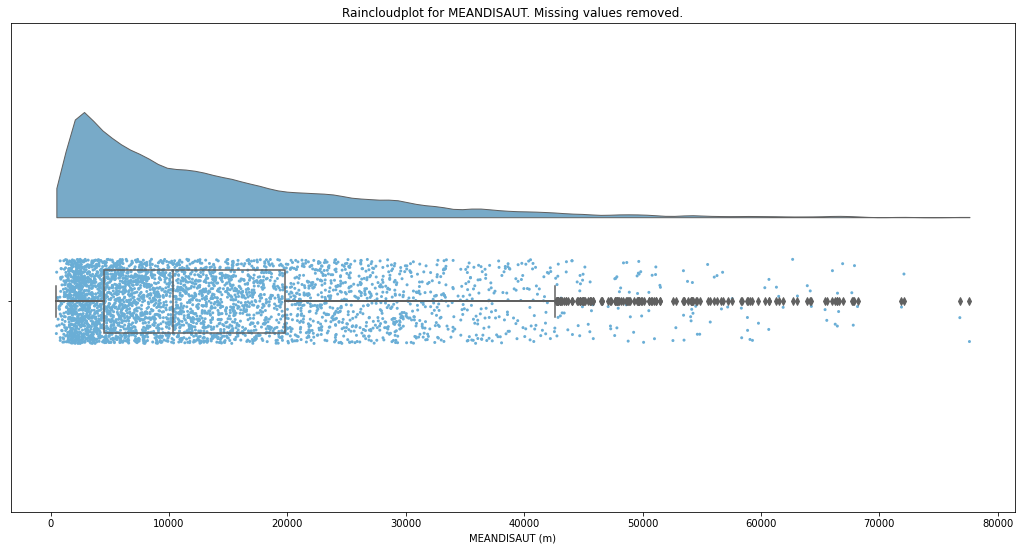

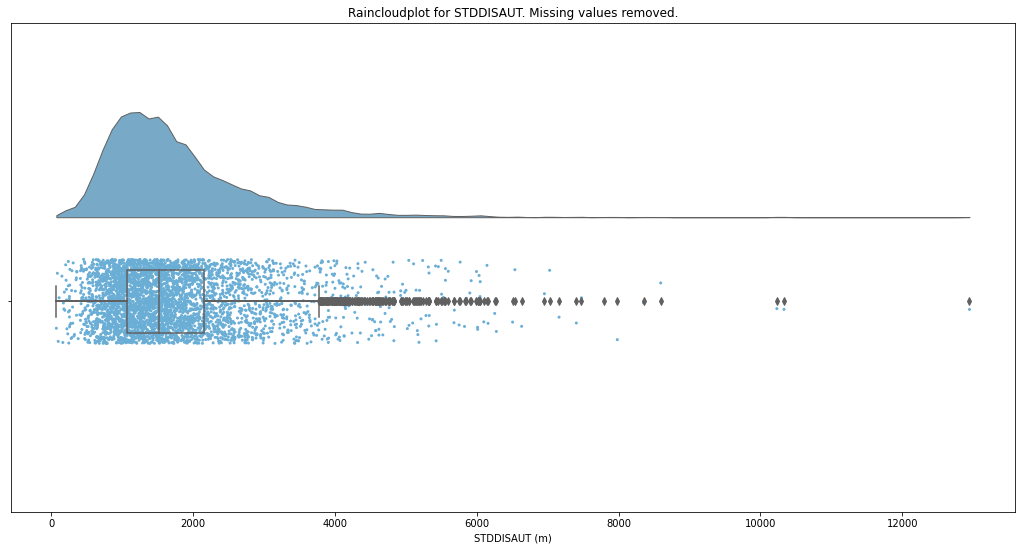

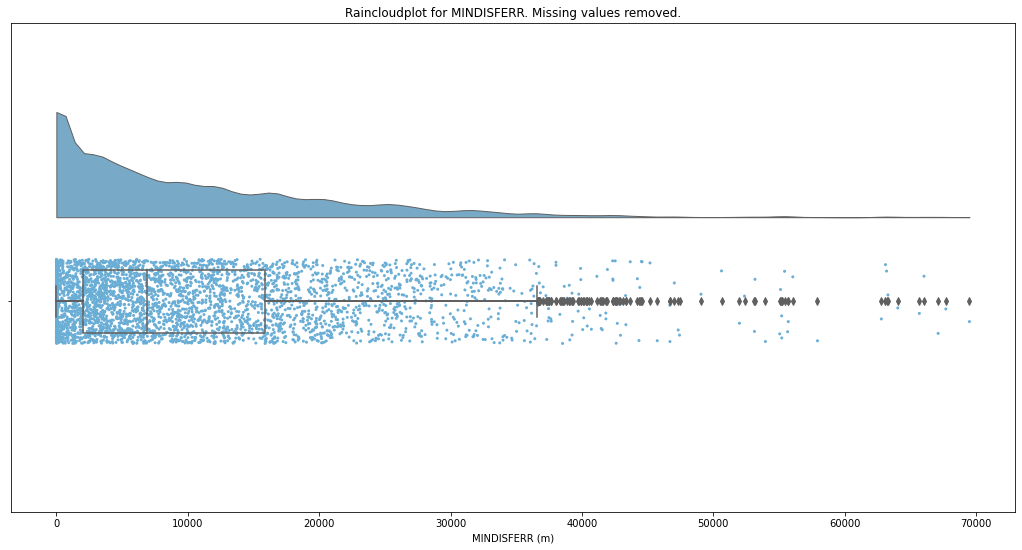

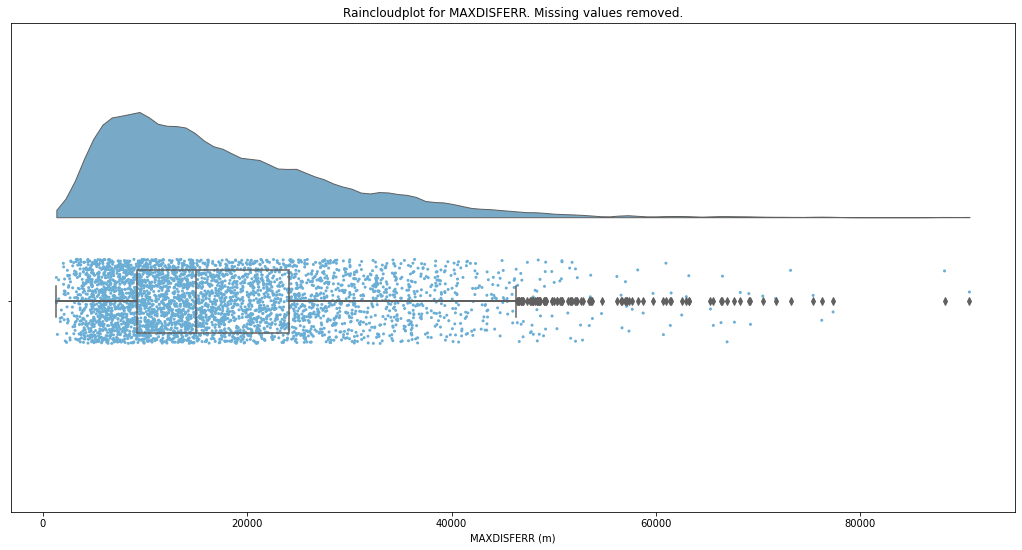

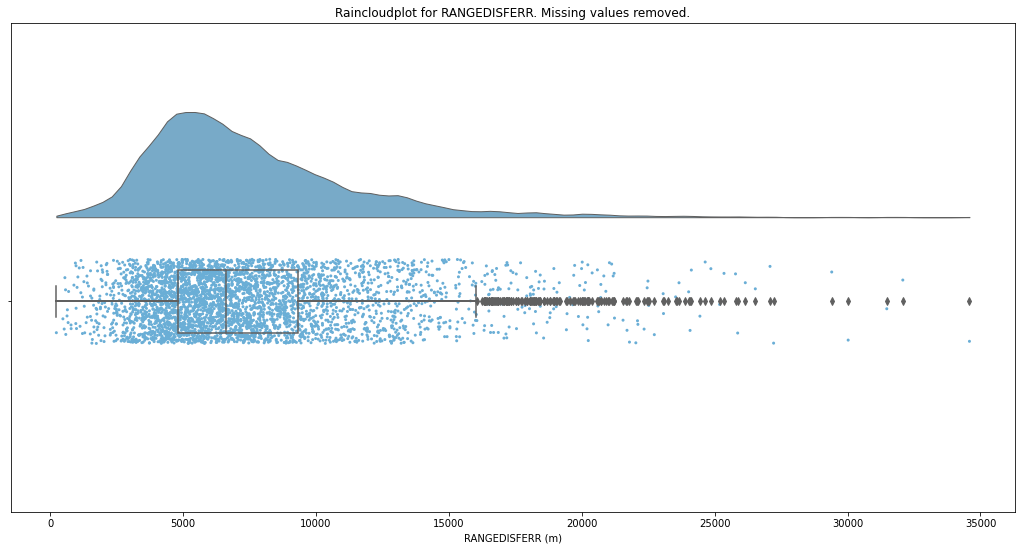

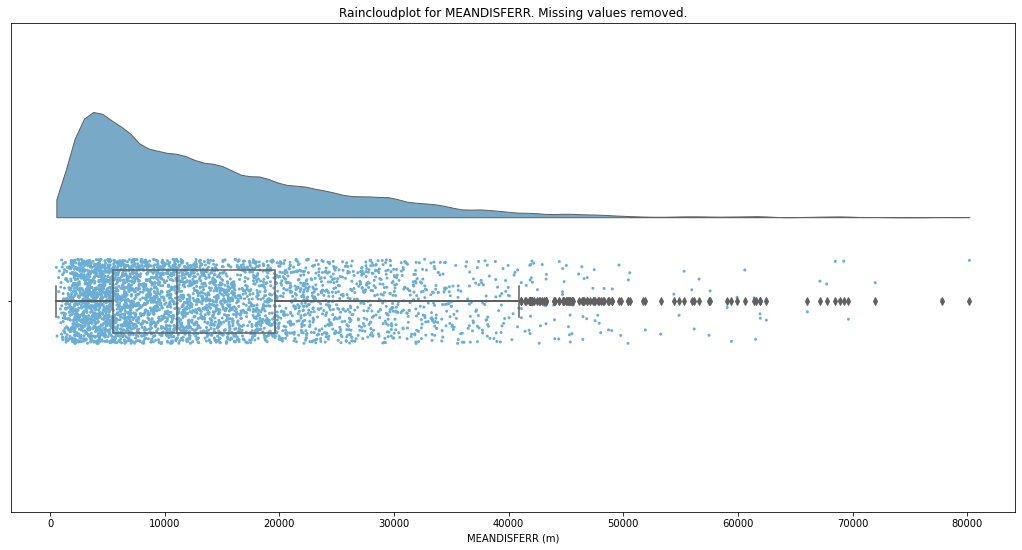

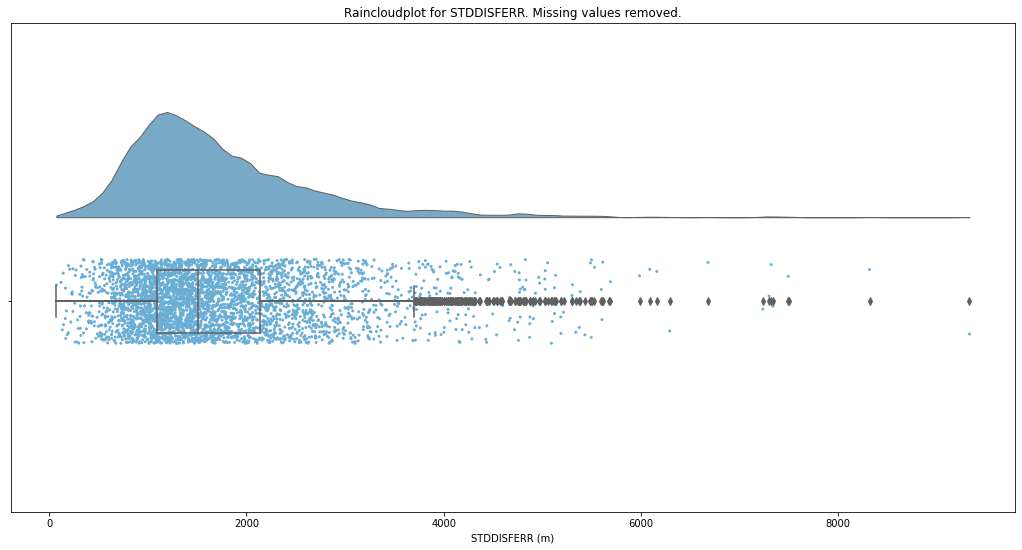

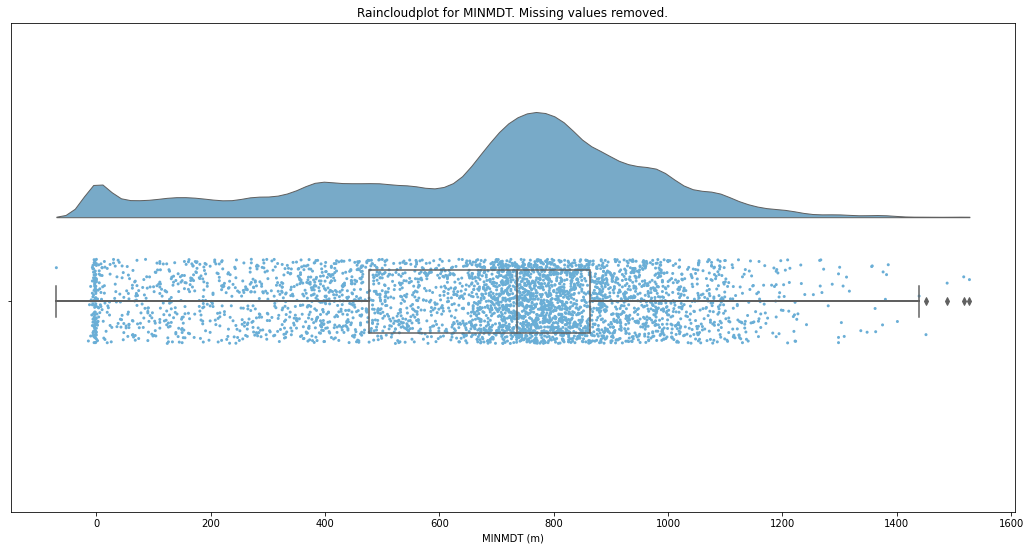

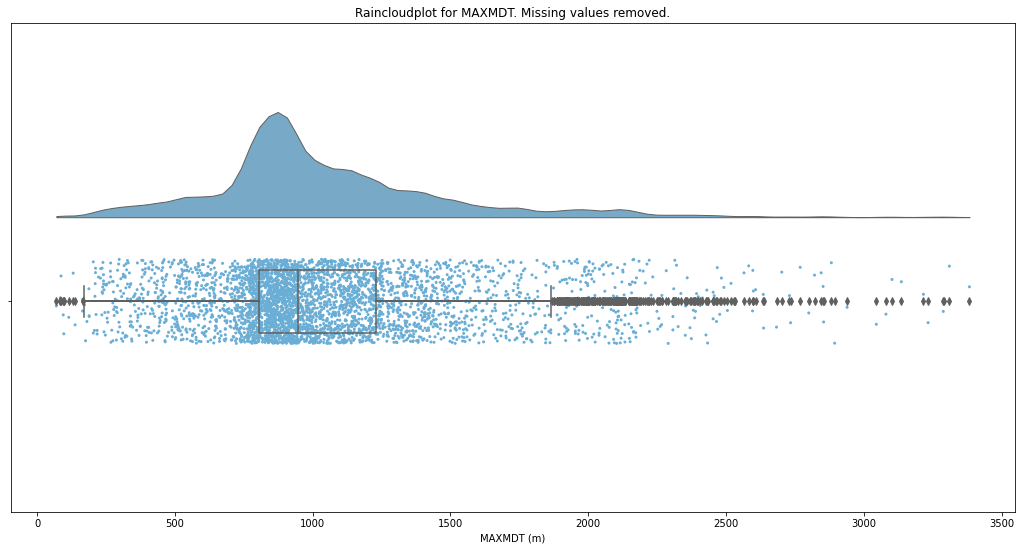

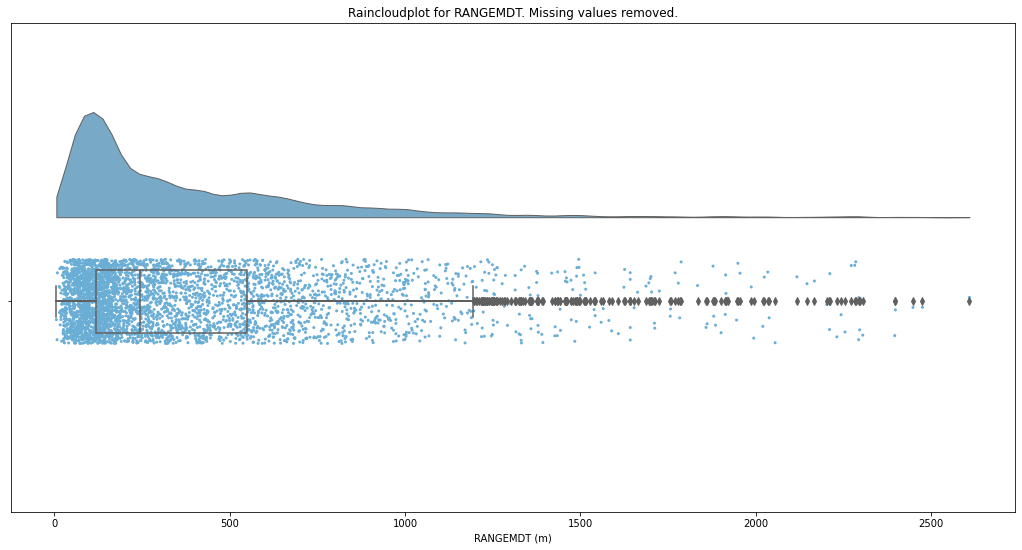

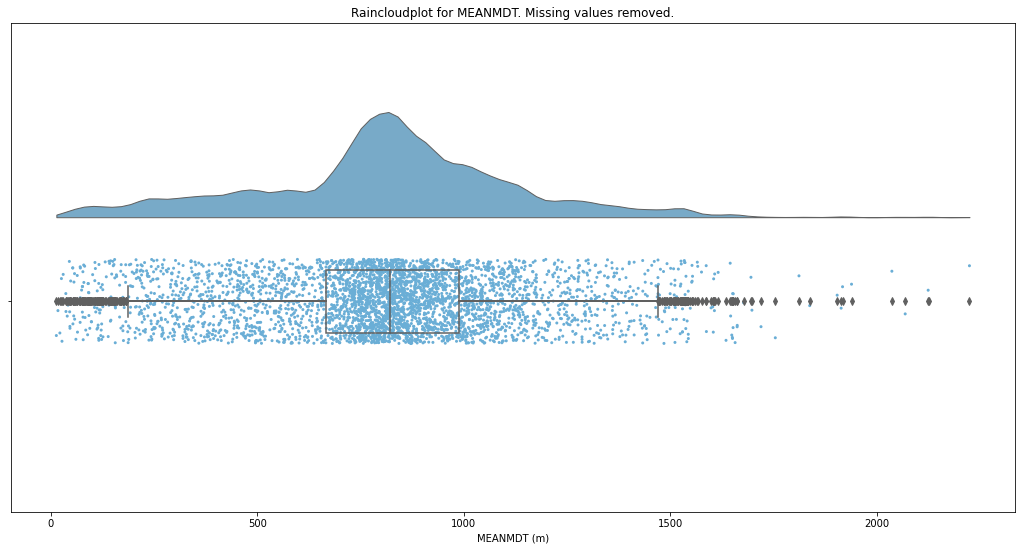

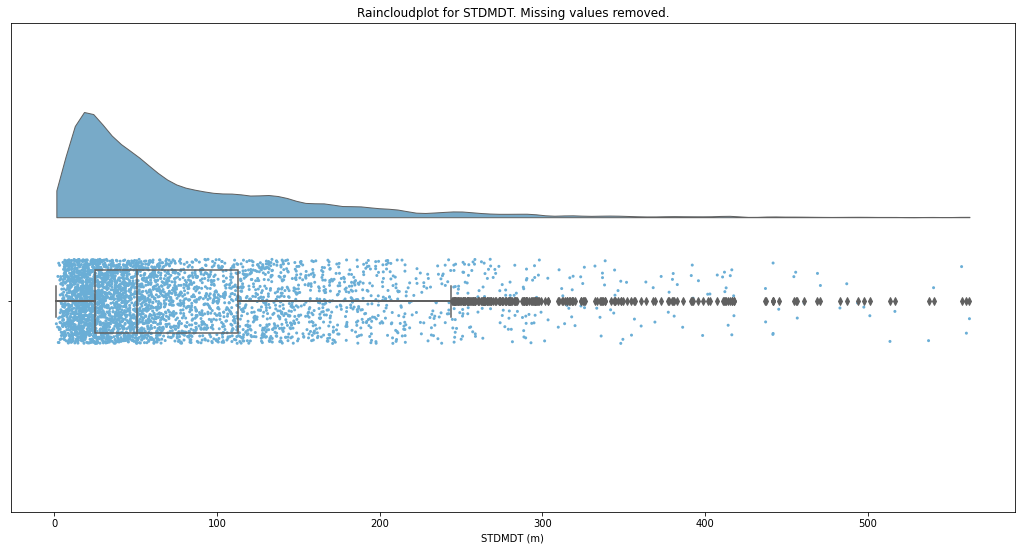

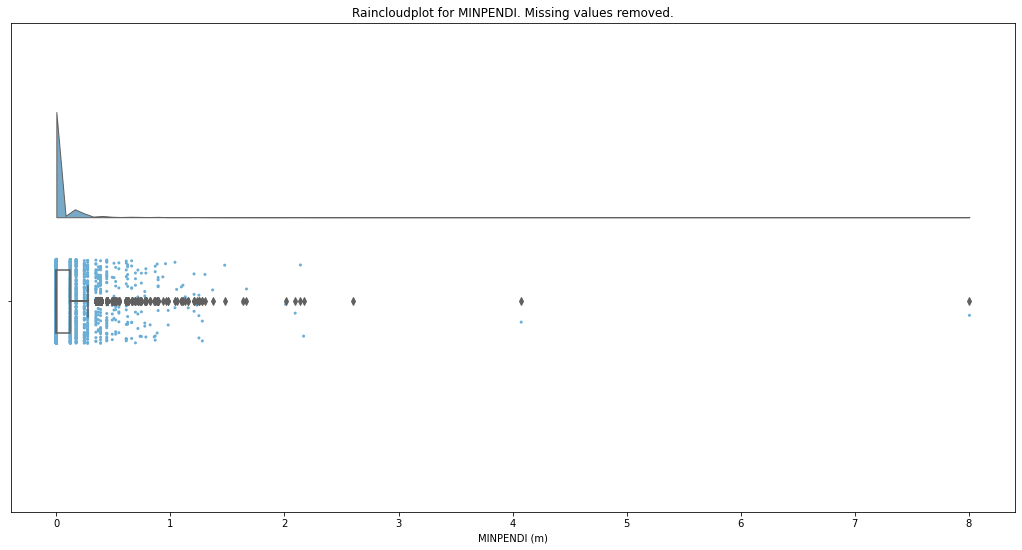

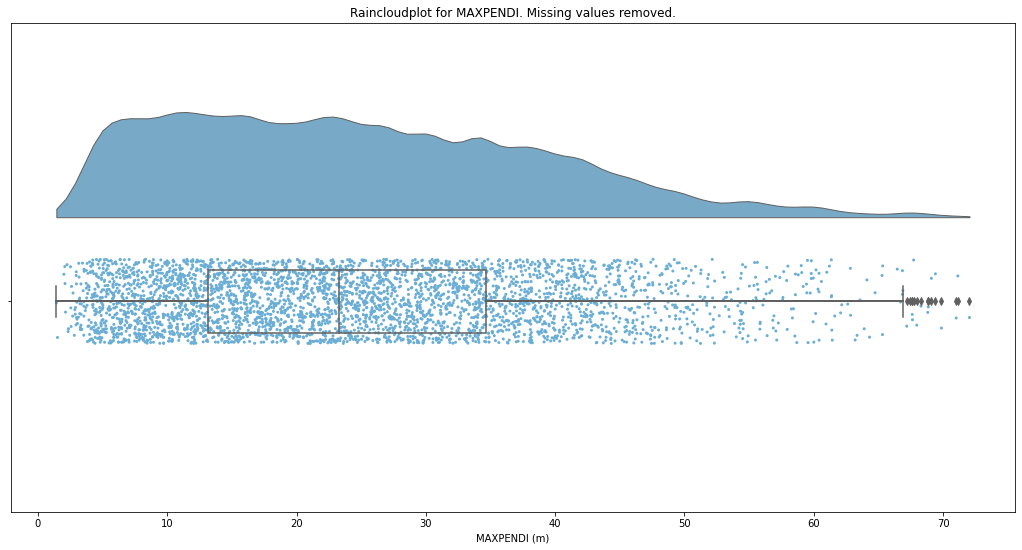

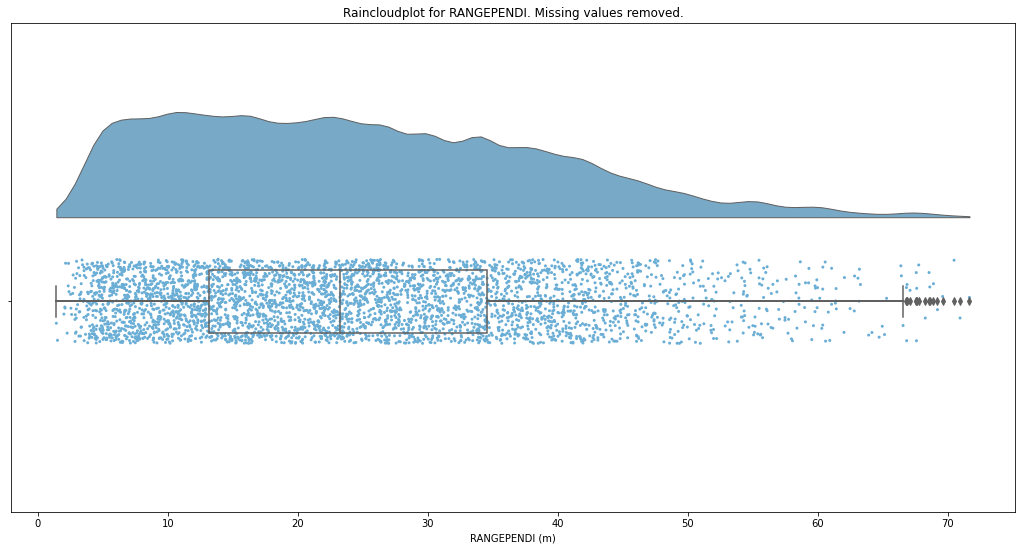

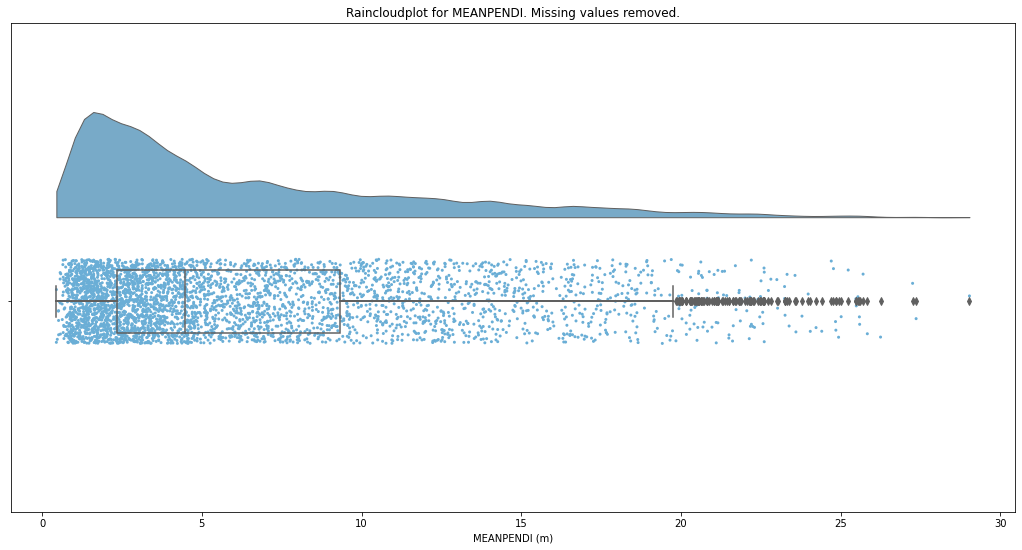

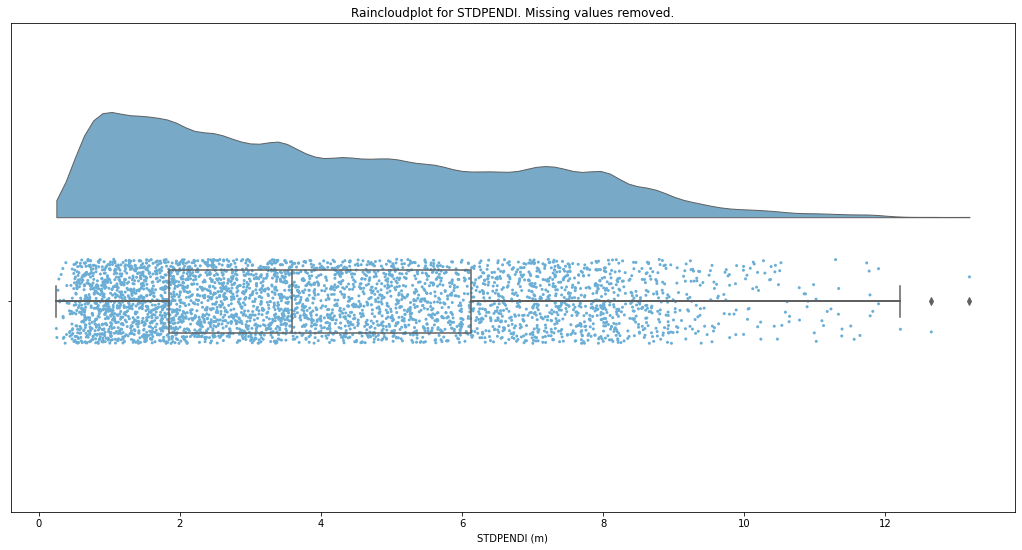

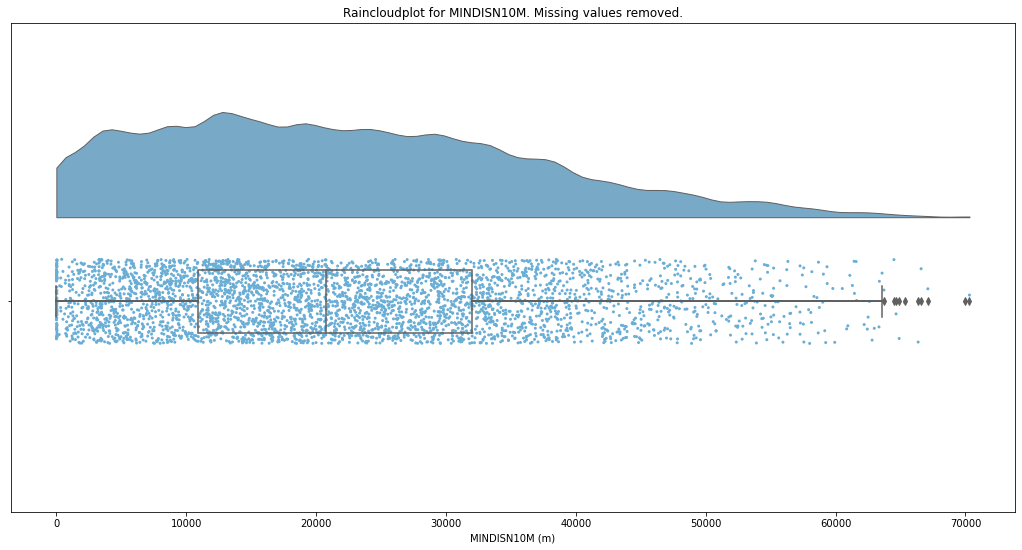

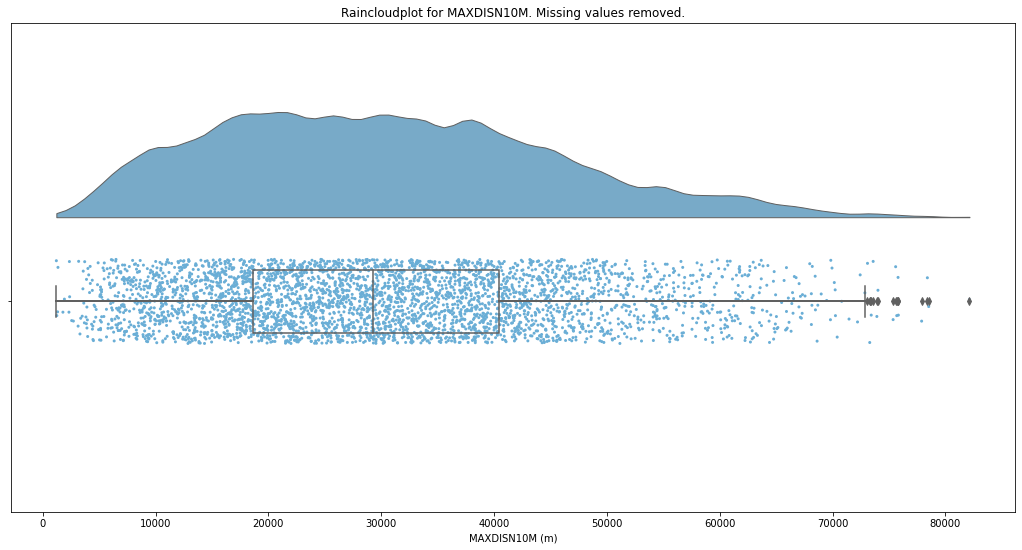

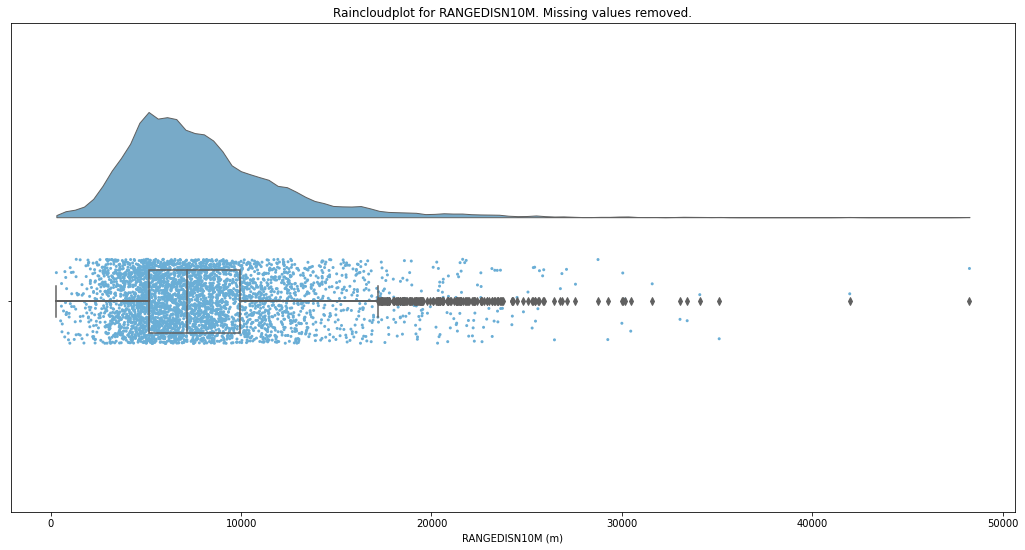

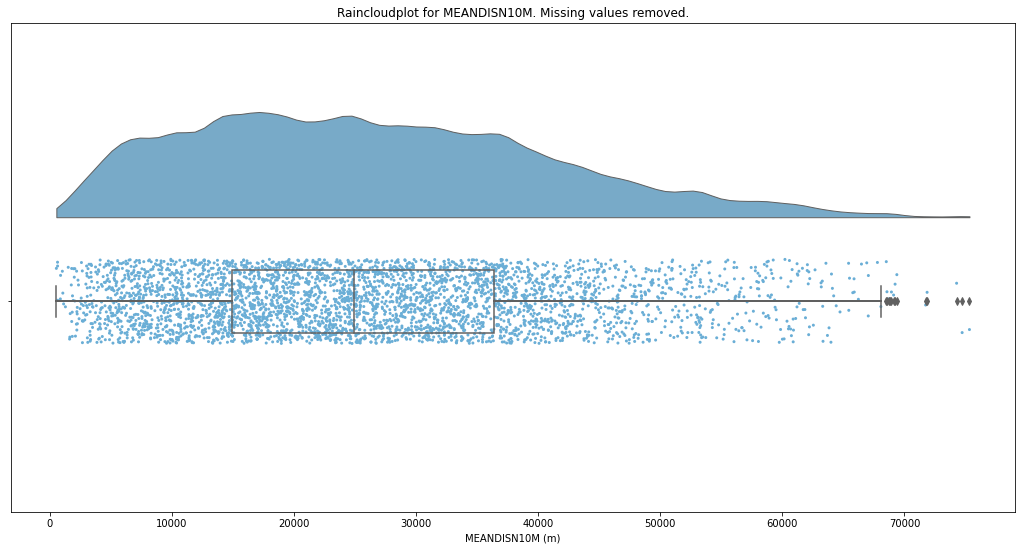

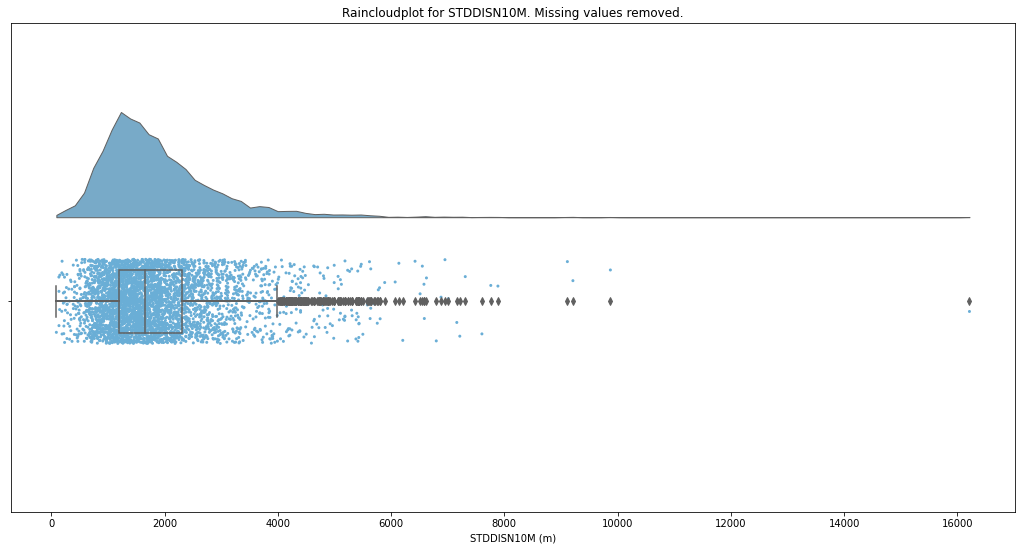

In [ ]:
for col in res_municipio.columns[1:]:
  raincloud_plotter(col)

In [ ]:
my_population_centres = [33024, 33042, 24089, 37274, 39085, 39035, 39075, 48020]
my_population_centres = [str(i) for i in my_population_centres]

In [ ]:
df_my_pc = res_municipio[res_municipio["CODMUNI"].isin(my_population_centres)]

* MINCARRETN: Distancia mínima (m) en el municipio a una carretera nacional. 
* MAXCARRETN: Distancia máxima (m) en el municipio a una carretera nacional. 
* RANGECARRETN: Rango de distancia (m) en el municipio a una carretera nacional. 
* **MEANCARRETN**: Distancia media (m) en el municipio a una carretera nacional. 
* STDCARRETN: Desviación estándar de la distancia (m) en el municipio a una carretera nacional. 
* MINDISAUT: Distancia mínima (m) en el municipio a una autopista o autovía. 
* MAXDISAUT: Distancia máxima (m) en el municipio a una autopista o autovía. 
* RANGEDISAUT: Rango de distancia (m) en el municipio a una autopista o autovía. 
* **MEANDISAUT**: Distancia media (m) en el municipio a una autopista o autovía. 
* STDDISAUT: Desviación estándar de la distancia (m) en el municipio a una autopista o autovía. 
* MINDISFERR: Distancia mínima (m) en el municipio a una estación de ferrocarril. 
* MAXDISFERR: Distancia máxima (m) en el municipio a una estación de ferrocarril
* RANGEDISFERR: Rango de distancia (m) en el municipio a una estación de ferrocarril.
* **MEANDISFERR**: Distancia media (m) en el municipio a una estación de ferrocarril
* STDDISFERR: Desviación estándar de la distancia (m) en el municipio a una estación de ferrocarril.
* MINMDT: Altitud mínima (m) en el municipio. 
* MAXMDT: Altitud máxima (m) en el municipio. 
* RANGEMDT: Rango altitudinal (m) en el municipio. 
* **MEANMDT**: Altitud media (m) en el municipio. 
* STDMDT: Desviación estándar de la altitud en el municipio. 
* MINPENDI: Pendiente mínima (grados) en el municipio. 
* MAXPENDI: Pendiente máxima (grados) en el municipio. 
* RANGEPENDI: Rango de pendiente (grados) en el municipio. 
* **MEANPENDI**: Pendiente media (grados) en el municipio. 
* STDPENDI: Desviación estándar de la pendiente en el municipio. 
* MINDISN10M: Distancia mínima (m) en el municipio a un núcleo de más de 10.000 habitantes
* MAXDISN10M: Distancia máxima (m) en el municipio a un núcleo de más de 10.000 habitantes. 
* RANGEDISN10M: Rango de distancia (m) en el municipio a un núcleo de más de 10.000 habitantes.
* **MEANDISN10M**: Distancia media (m) en el municipio a un núcleo de más de 10.000 habitantes.
* STDDISN10M: Desviación estándar de la distancia (m) en el municipio a un núcleo de más de 10.000 habitantes. 

In [ ]:
my_means = ["CODMUNI", "MEANCARRETN", "MEANDISAUT", "MEANDISFERR",
            "MEANPENDI", "MEANMDT", "MEANDISN10M"]
df_my_pc = df_my_pc[my_means]

In [ ]:
df_my_pc

,CODMUNI,MEANCARRETN,MEANDISAUT,MEANDISFERR,MEANPENDI,MEANMDT,MEANDISN10M
24,33024,3864.110310,1981.124894,3526.531455,8.030764,123.193442,6490.586817
42,33042,2329.964896,1805.416570,1399.511289,4.955678,229.443510,4101.466028
906,24089,1056.845468,860.384933,2095.330494,2.267796,839.681294,2488.259734
1498,37274,1455.356540,1587.691030,2845.386948,2.880397,811.855511,2771.981892
2377,39085,3823.505434,3933.699944,3588.079635,5.522714,57.649513,7050.115589
2419,39035,1337.714058,1835.260835,4046.212158,5.888033,57.969616,1837.223309
2455,39075,2736.969834,1742.868156,1672.947567,3.461595,25.932561,1671.173999
2652,48020,4521.362699,1417.942382,1479.515158,12.100051,145.803400,2593.311687


In [ ]:
# Pasamos a kilómetros
df_my_pc["MEANCARRETN"] = df_my_pc["MEANCARRETN"] / 1000
df_my_pc["MEANDISAUT"]  = df_my_pc["MEANDISAUT"]  / 1000
df_my_pc["MEANDISFERR"] = df_my_pc["MEANDISFERR"] / 1000
df_my_pc["MEANDISN10M"] = df_my_pc["MEANDISN10M"] / 1000

In [ ]:
df_my_pc

,CODMUNI,MEANCARRETN,MEANDISAUT,MEANDISFERR,MEANPENDI,MEANMDT,MEANDISN10M
24,33024,3.864110,1.981125,3.526531,8.030764,123.193442,6.490587
42,33042,2.329965,1.805417,1.399511,4.955678,229.443510,4.101466
906,24089,1.056845,0.860385,2.095330,2.267796,839.681294,2.488260
1498,37274,1.455357,1.587691,2.845387,2.880397,811.855511,2.771982
2377,39085,3.823505,3.933700,3.588080,5.522714,57.649513,7.050116
2419,39035,1.337714,1.835261,4.046212,5.888033,57.969616,1.837223
2455,39075,2.736970,1.742868,1.672948,3.461595,25.932561,1.671174
2652,48020,4.521363,1.417942,1.479515,12.100051,145.803400,2.593312


In [ ]:
from google.colab import files
df_my_pc.to_csv('df_estructura.csv') 
files.download('df_estructura.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>